In [ ]:
import pandas as pd
import numpy as np
import dateutil.parser
import datetime
from collections import defaultdict
from datetime import datetime as dt
from datetime import time
from datetime import timedelta
from datetime import date
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
MTA_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtred_data.csv") # Reading the csv file by pandas

df = MTA_data.copy() # Taking the copy of the dataframe to prevent damage to the main dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099499 entries, 0 to 2099498
Data columns (total 12 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   Unnamed: 0                                                            int64 
 1   C/A                                                                   object
 2   UNIT                                                                  object
 3   SCP                                                                   object
 4   STATION                                                               object
 5   LINENAME                                                              object
 6   DIVISION                                                              object
 7   DATE                                                                  object
 8   TIME                                                          

In [36]:
df.shape

(2099492, 20)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2099499.0,1.049746e+05,6.060767e+04,0.0,52487.0,104974.0,157462.0,2.106170e+05
ENTRIES,2099499.0,4.277153e+07,2.233300e+08,0.0,246678.5,1357864.0,5979334.0,2.147338e+09
EXITS,2099499.0,3.444712e+07,1.969431e+08,0.0,126879.5,873647.0,3971503.5,2.122532e+09


In [6]:
df.isnull().sum()

Unnamed: 0                                                              0
C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [9]:
df.head(10)

,Unnamed: 0,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,23:00:00,REGULAR,7675936,2649668,2022-01-01 23:00:00
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,03:00:00,REGULAR,7675940,2649670,2022-01-02 03:00:00
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,07:00:00,REGULAR,7675942,2649674,2022-01-02 07:00:00
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,11:00:00,REGULAR,7675957,2649727,2022-01-02 11:00:00
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,15:00:00,REGULAR,7675986,2649769,2022-01-02 15:00:00


In [10]:
df.tail(10)

,Unnamed: 0,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
2099489,210228,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/10/2022,08:00:00,REGULAR,0,23,2022-03-10 08:00:00
2099490,210229,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/10/2022,12:00:00,REGULAR,0,23,2022-03-10 12:00:00
2099491,210230,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/10/2022,16:00:00,REGULAR,0,23,2022-03-10 16:00:00
2099492,210231,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/10/2022,20:00:00,REGULAR,0,23,2022-03-10 20:00:00
2099493,210232,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,00:00:00,REGULAR,0,23,2022-03-11 00:00:00
2099494,210233,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,04:00:00,REGULAR,0,23,2022-03-11 04:00:00
2099495,210234,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,08:00:00,REGULAR,0,23,2022-03-11 08:00:00
2099496,210235,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,12:00:00,REGULAR,0,23,2022-03-11 12:00:00
2099497,210236,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,16:00:00,REGULAR,0,23,2022-03-11 16:00:00
2099498,210237,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,20:00:00,REGULAR,0,23,2022-03-11 20:00:00


In [7]:
df.rename(columns = {"C/A" : "CA"},inplace = True) # Renamed CA with rename function to remove "/"
df.columns = [column.strip() for column in df.columns] # columns in the dataframe have been stripped for analysis

In [8]:
df['DATETIME'] = pd.to_datetime(df['DATE']+ ' '+ df['TIME']) #Reserved for examining the days and hours in the Datatime column and making transactions

In [11]:

df['DAYS'] = df['DATETIME'].apply(lambda x: calendar.day_name[x.weekday()]) #  It was used to find out which day the date in Date corresponds to and print it in df
df.drop_duplicates(subset = ['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME','LINENAME'], inplace = True) # Values found in duplicated were discarded from the dataframe

In [12]:
# Compute the difference between consecutive rows of the 'ENTRIES' and 'EXITS' columns and store the results in the 'ENTRY_RAW' and 'EXIT_RAW' columns
df['ENTRY_RAW'] = df['ENTRIES'].diff()
df['EXIT_RAW'] = df['EXITS'].diff()

# Replace values in the 'ENTRY_RAW' and 'EXIT_RAW' columns that are either less than 0 or greater than 10,000 with np.nan (Not a Number)
df['ENTRY_RAW'][(df['ENTRY_RAW'] < 0) | (df['ENTRY_RAW'] > 10000)] = np.nan
df['EXIT_RAW'][(df['EXIT_RAW'] < 0) | (df['EXIT_RAW'] > 10000)] = np.nan
df.head(10)

<ipython-input-12-e82b1fb56b07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTRY_RAW'][(df['ENTRY_RAW'] < 0) | (df['ENTRY_RAW'] > 10000)] = np.nan
<ipython-input-12-e82b1fb56b07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXIT_RAW'][(df['EXIT_RAW'] < 0) | (df['EXIT_RAW'] > 10000)] = np.nan


In [13]:
# Reset the index of the dataframe and drop the 'index' column
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [14]:
# Create a list of the values in the 'ENTRY_RAW' column
raw_list = list(df['ENTRY_RAW'])

# Iterate over the values in the list
for ind, i in enumerate(raw_list):
    # If the value is nan, replace it with the mean of the values at indices ind-2, ind-1, ind+1, and ind+2
    if np.isnan(i):
        raw_list[ind] = np.nanmean([raw_list[ind-2], raw_list[ind-1], raw_list[ind+1], raw_list[ind+2]])

# Assign the modified list to a new 'ENTRY_RAW_1' column in the dataframe
df['ENTRY_RAW_1'] = raw_list

In [15]:
df.head(5)

,Unnamed: 0,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYS,ENTRY_RAW,EXIT_RAW,ENTRY_RAW_1
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00,Saturday,NaN,NaN,3.75
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00,Saturday,4.0,3.0,4.00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00,Saturday,11.0,43.0,11.00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00,Saturday,8.0,32.0,8.00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00,Saturday,25.0,31.0,25.00


In [16]:
df.isnull().sum()

Unnamed: 0         0
CA                 0
UNIT               0
SCP                0
STATION            0
LINENAME           0
DIVISION           0
DATE               0
TIME               0
DESC               0
ENTRIES            0
EXITS              0
DATETIME           0
DAYS               0
ENTRY_RAW      69071
EXIT_RAW       59871
ENTRY_RAW_1        0
dtype: int64

In [17]:
entry_raw_1_nulls = df['ENTRY_RAW_1'].isnull().sum() # Calculate and store the number of nan values in the 'ENTRY_RAW_1' column

raw_list = list(df['EXIT_RAW']) # Create a list of the values in the 'EXIT_RAW' column

In [18]:
# Iterate over the values in the list
for ind, i in enumerate(raw_list):
    # If the value is nan, replace it with the mean of the values at indices ind-1 and ind+1
    if np.isnan(i):
        raw_list[ind] = np.nanmean([raw_list[ind-1], raw_list[ind+1]])
        
df['EXIT_RAW_1'] = raw_list # Assign the modified list to a new 'EXIT_RAW_1' column in the dataframe
exit_raw_1_nulls = df['EXIT_RAW_1'].isnull().sum() # Calculate and store the number of nan values in the 'EXIT_RAW_1' column

In [19]:
df['TRAFFIC'] = df['ENTRY_RAW_1'] + df['EXIT_RAW_1'] # Create a new 'TRAFFIC' column that is the sum of the 'ENTRY_RAW_1' and 'EXIT_RAW_1' columns

In [20]:
df['DATE'] = pd.to_datetime(df['DATE']) # Convert the 'DATE' column to a datetime data type
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.time # Convert the 'TIME' column to a time data type
df['DAYS_INDEX'] = df['DATE'].dt.weekday # Create a new 'DAYS_INDEX' column that is the day of the week (as an integer) for each row
df.head(10)

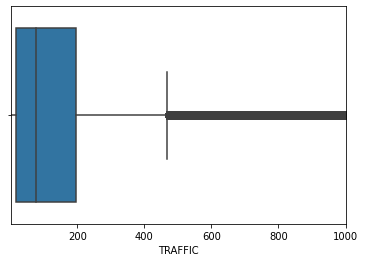

In [21]:
# Set up a box plot of the 'TRAFFIC' column with x-axis limits set to 1 and 1000
fig, ax = plt.subplots()
sns.boxplot(x = df['TRAFFIC'], ax = ax)
ax.set_xlim(1,1000)
plt.show()

In [22]:
print(f"Max traffic: {df['TRAFFIC'].max()}") # Calculate and display the maximum value in the 'TRAFFIC' column

# Group the dataframe by 'STATION' and aggregate the 'TRAFFIC' column by summing the values
top_stations = df.groupby('STATION')[['TRAFFIC']].agg({'TRAFFIC': 'sum'}).sort_values("TRAFFIC" , ascending = False).head(10)

# Display the top 10 rows of the resulting dataframe
print(top_stations.head(10))

Max traffic: 18441.0
                      TRAFFIC
STATION                      
34 ST-PENN STA   7.365204e+06
GRD CNTRL-42 ST  6.048466e+06
34 ST-HERALD SQ  5.639998e+06
86 ST            5.269109e+06
42 ST-PORT AUTH  5.102883e+06
14 ST-UNION SQ   4.950777e+06
23 ST            4.950763e+06
125 ST           4.503841e+06
TIMES SQ-42 ST   4.503217e+06
FULTON ST        4.418086e+06


In [23]:
# This function convert a number to a string representation with the appropriate suffix (e.g., K for thousands, M for millions, etc.).
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

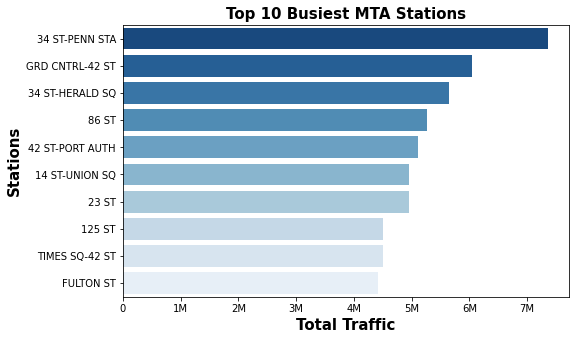

In [25]:
# Set up a bar plot of the 'TRAFFIC' column against the 'STATION' column in the 'top_stations' dataframe
plt.figure(figsize = [8,5])
ax = sns.barplot(data = top_stations.head(10).reset_index(), x = 'TRAFFIC', y = 'STATION', palette = 'Blues_r')

# Set the x-axis label to 'Total Traffic' with a bold font and size of 15
plt.xlabel('Total Traffic', weight = 'bold', fontsize = 15)

# Set the y-axis label to 'Stations' with a bold font and size of 15
plt.ylabel('Stations', weight = 'bold', fontsize = 15)

# Format the x-axis tick labels using the 'human_format' function
ax.xaxis.set_major_formatter(FuncFormatter(human_format))

# Set the title of the plot to 'Top 10 Busiest MTA Stations' with a bold font and size of 15
plt.title('Top 10 Busiest MTA Stations', weight = 'bold', fontsize = '15');


In [26]:
# Loop through the patches in the plot and add an annotation with the value of the patch's width in millions of units
for p in ax.patches:
       ax.annotate(str(float('{:.1f}'.format(p.get_width()/1000000)))+'M', (p.get_width(), p.get_y()+0.5))

# Remove the top and right spines from the plot
sns.despine()

# Save the plot to a file named 'barplot.png'
plt.savefig('barplot.png', transparent = True, bbox_inches = 'tight')

# Group the rows of the 'MTA_data' dataframe by 'STATION', 'DAYS', and 'DAYS_INDEX' and aggregate the 'TRAFFIC' column by summing the values
top_station_day_index = df.groupby(['STATION','DAYS',"DAYS_INDEX"]).agg({'TRAFFIC':'sum'}).reset_index()[["STATION","DAYS","TRAFFIC","DAYS_INDEX"]]

# Select rows from the resulting dataframe where the 'STATION' column is equal to '34 ST-PENN STA' and sort the rows by 'DAYS_INDEX' in ascending order
penn = top_station_day_index[top_station_day_index['STATION'] == "34 ST-PENN STA"].sort_values("DAYS_INDEX", ascending=True)

<Figure size 432x288 with 0 Axes>

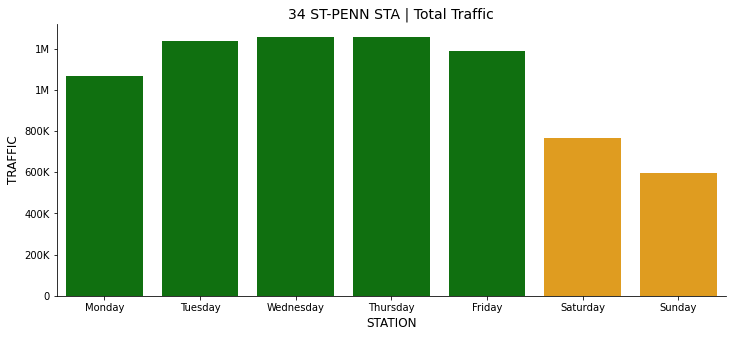

In [27]:
# Create a list of colors based on the 'TRAFFIC' column in the 'penn' dataframe
clrs = ['orange' if x < 800000 else 'Green' for x in penn['TRAFFIC'].values]

# Set up a bar plot of the 'TRAFFIC' column against the 'DAYS' column in the 'penn' dataframe
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = penn['DAYS'], y = 'TRAFFIC', data = penn, ax = ax,  palette = clrs)

# Set the title of the plot to '34 ST-PENN STA | Total Traffic' with a font size of 14
ax.set_title('34 ST-PENN STA | Total Traffic', fontsize = 14)

# Set the y-axis label to 'TRAFFIC' with a rotation of 90 and a font size of 12
ax.set_ylabel('TRAFFIC', rotation = 90, fontsize = 12)

# Set the x-axis label to 'STATION' with a font size of 12
ax.set_xlabel('STATION', fontsize = 12)

# Format the y-axis tick labels using the 'human_format' function
ax.yaxis.set_major_formatter(FuncFormatter(human_format))

# Remove the right and top spines from the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [28]:
# Select rows from the 'MTA_data' dataframe where the 'STATION' column is in the list of the top 10 busiest stations
df_10 = df[df['STATION'].isin(list(top_stations.head(10).index))]

# Group the rows by 'STATION' and 'DAYS' and aggregate the 'TRAFFIC' column by summing the values
top_stations_day = df_10.groupby(['STATION','DAYS'])['TRAFFIC'].sum()

# Reshape the resulting dataframe into a matrix with 'STATION' as the rows and 'DAYS' as the columns
matrix_station_day = top_stations_day.unstack()

# Reorder the columns of the matrix so that they are in the order "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
matrix_station_day = matrix_station_day.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Reorder the rows of the matrix so that they are in the order of the top 10 busiest stations
matrix_station_day = matrix_station_day.reindex(index = list(top_stations.head(10).index))

# Apply a function to each element of the matrix that formats the element as a string with the value in millions of units (e.g., if the element is 1500000, the string would be "1.5M")
matrix_station_day.applymap(lambda x: str(round(x / 1000000, 1)) + 'M')

# Create an array from the matrix
array = np.array(matrix_station_day.applymap(lambda x: str(round(x / 1000000, 1)) + 'M'))


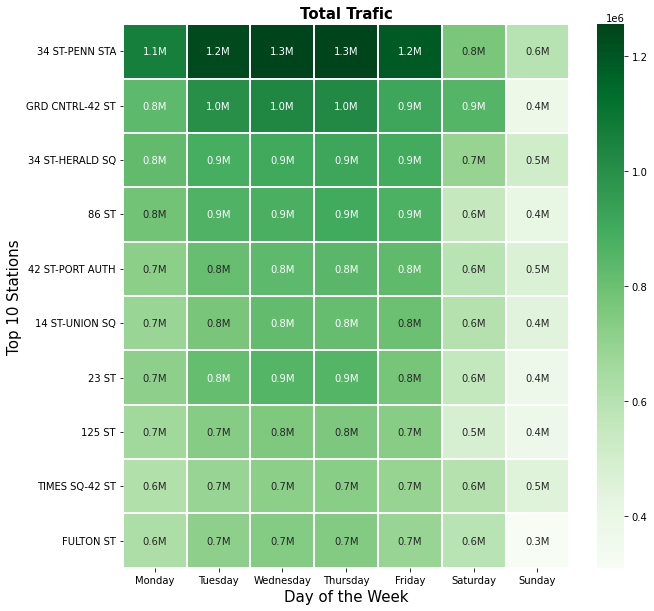

In [29]:
# Set up a figure with a size of [10,10]
fig2 = plt.figure(figsize = [10,10])

# Set up a heatmap of the 'matrix_station_day' dataframe with a 'Greens' color map and white lines between the cells
ax2 = sns.heatmap(matrix_station_day, cmap = 'Greens', linecolor = 'white', linewidths = 1, annot = array, fmt = '')

# Set the x-axis label to 'Day of the Week' with a font size of 15
plt.xlabel('Day of the Week', fontsize = 15)

# Set the y-axis label to 'Top 10 Stations' with a font size of 15
plt.ylabel('Top 10 Stations', fontsize = 15)

# Set the title of the plot to 'Total Trafic' with a font size of 15 and weight of 'bold'
plt.title('Total Trafic', weight = 'bold', fontsize = 15)

# Save the plot as a PNG file with a transparent background and tight bounding box
plt.savefig('heatmap1.png', transparent = True, bbox_inches = 'tight')


In [30]:
# Create a data frame for the '34 ST-PENN STA' station, sorted by the 'DAYS_INDEX' column in ascending order
penn = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "34 ST-PENN STA"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the 'GRD CNTRL-42 ST' station, sorted by the 'DAYS_INDEX' column in ascending order
grd = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "GRD CNTRL-42 ST"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the '34 ST-HERALD SQ' station, sorted by the 'DAYS_INDEX' column in ascending order
herald = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "34 ST-HERALD SQ"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the '86 ST' station, sorted by the 'DAYS_INDEX' column in ascending order
st86 = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "86 ST"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the '42 ST-PORT AUTH' station, sorted by the 'DAYS_INDEX' column in ascending order
port = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "42 ST-PORT AUTH"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the 'Times' station, sorted by the 'DAYS_INDEX' column in ascending order
times = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "TIMES SQ-42 ST" ].sort_values("DAYS_INDEX",ascending = True)

# Create a data frame for the '14 ST-UNION SQ' station, sorted by the 'DAYS_INDEX' column in ascending order
union = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "14 ST-UNION SQ"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the '23 ST' station, sorted by the 'DAYS_INDEX' column in ascending order
st23 = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "23 ST"].sort_values("DAYS_INDEX", ascending = True)

# Create a data frame for the '125 ST' station, sorted by the 'DAY
st125 = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "125 ST" ].sort_values("DAYS_INDEX",ascending = True)

# Create a data frame for the 'FULTON ST' station, sorted by the 'DAYS_INDEX' column in ascending order
fulton = top_station_day_index[top_station_day_index.loc[:, "STATION"] == "FULTON ST"].sort_values("DAYS_INDEX", ascending = True)

# Create a list of the data frames for the top 10 busiest stations
stations = [penn, grd, herald, st86, port, union, st23, st125, times, fulton]

stations = [penn, grd, herald ,st86 ,port]
top10_line_Data = pd.concat(stations)
top10_line_Data

,STATION,DAYS,TRAFFIC,DAYS_INDEX
428,34 ST-PENN STA,Monday,1.066542e+06,0
432,34 ST-PENN STA,Tuesday,1.236959e+06,1
433,34 ST-PENN STA,Wednesday,1.254119e+06,2
431,34 ST-PENN STA,Thursday,1.256233e+06,3
427,34 ST-PENN STA,Friday,1.189946e+06,4
429,34 ST-PENN STA,Saturday,7.654435e+05,5
430,34 ST-PENN STA,Sunday,5.959613e+05,6
1632,GRD CNTRL-42 ST,Monday,8.381319e+05,0
1636,GRD CNTRL-42 ST,Tuesday,1.001048e+06,1
1637,GRD CNTRL-42 ST,Wednesday,1.031489e+06,2


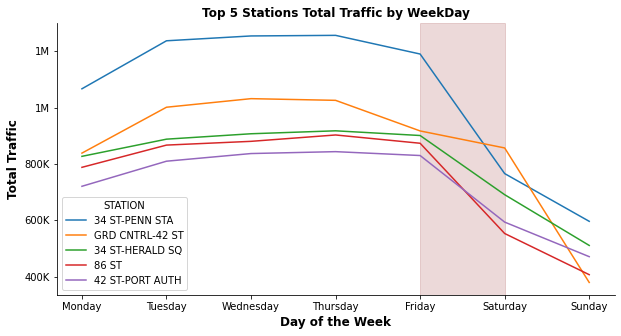

In [31]:
# Create a figure and set the figure size
fig, ax = plt.subplots(figsize = (10, 5))

# Use seaborn's lineplot function to plot the total traffic for each station by day of the week
sns.lineplot(data = top10_line_Data, x = "DAYS", y = "TRAFFIC", hue = "STATION")

# Set the y-axis tick formatter to display the tick labels in millions
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(human_format))

# Add a shaded area to highlight the weekend days
ax.axvspan("Friday", "Saturday", alpha = 0.15, color = 'maroon')

# Set the plot title and labels for the x and y axes
ax.set_title('Top 5 Stations Total Traffic by WeekDay', weight = 'bold')
plt.xlabel('Day of the Week', weight = 'bold', fontsize = 12)
plt.ylabel('Total Traffic', weight = 'bold', fontsize = 12)

# Remove the spines for the top and right axes
sns.despine()

# Save the figure as a PNG file
plt.savefig('traffic_by_day_of_week_top_5.png', transparent = True, bbox_inches = 'tight')


In [32]:
#This function takes a time object as input and returns a string indicating which 4-hour time period the input time belongs to.
def timeperiod(time):
    
    # Check if the input time is between midnight (12:00 AM) and 4:00 AM
    if time >= datetime.time(0,0,0) and time < datetime.time(4,0,0):
        return "12am-4am"
    
    # Check if the input time is between 4:00 AM and 8:00 AM
    elif time >= datetime.time(4,0,0) and time < datetime.time(8,0,0):
        return "4am-8am"
    
    # Check if the input time is between 8:00 AM and 12:00 PM
    elif time >= datetime.time(8,0,0) and time < datetime.time(12,0,0):
        return "8am-12pm"
    
    # Check if the input time is between 12:00 PM and 4:00 PM
    elif time >= datetime.time(12,0,0) and time < datetime.time(16,0,0):
        return "12pm-4pm"    
    
    # Check if the input time is between 4:00 PM and 8:00 PM
    elif time >= datetime.time(16,0,0) and time < datetime.time(20,0,0):
        return "4pm-8pm"    
    
    # If the input time does not match any of the above conditions, it must be between 8:00 PM and midnight
    else:
        return "8pm-12am"

df_10['TIME']=pd.to_datetime(df_10['TIME'],format='%H:%M:%S').dt.time

df_10['TIME_PERIOD'] = df_10['TIME'].apply(timeperiod)

<ipython-input-32-779cb05297ae>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['TIME']=pd.to_datetime(df_10['TIME'],format='%H:%M:%S').dt.time
<ipython-input-32-779cb05297ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['TIME_PERIOD'] = df_10['TIME'].apply(timeperiod)


In [34]:
df.head(10)

,Unnamed: 0,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYS,ENTRY_RAW,EXIT_RAW,ENTRY_RAW_1,EXIT_RAW_1,TRAFFIC,DAYS_INDEX
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-01,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00,Saturday,NaN,NaN,3.75,1.5,5.25,5
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-01,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00,Saturday,4.0,3.0,4.00,3.0,7.00,5
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-01,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00,Saturday,11.0,43.0,11.00,43.0,54.00,5
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-01,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00,Saturday,8.0,32.0,8.00,32.0,40.00,5
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-01,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00,Saturday,25.0,31.0,25.00,31.0,56.00,5
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-01,23:00:00,REGULAR,7675936,2649668,2022-01-01 23:00:00,Saturday,16.0,11.0,16.00,11.0,27.00,5
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-02,03:00:00,REGULAR,7675940,2649670,2022-01-02 03:00:00,Sunday,4.0,2.0,4.00,2.0,6.00,6
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-02,07:00:00,REGULAR,7675942,2649674,2022-01-02 07:00:00,Sunday,2.0,4.0,2.00,4.0,6.00,6
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-02,11:00:00,REGULAR,7675957,2649727,2022-01-02 11:00:00,Sunday,15.0,53.0,15.00,53.0,68.00,6
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-01-02,15:00:00,REGULAR,7675986,2649769,2022-01-02 15:00:00,Sunday,29.0,42.0,29.00,42.0,71.00,6


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2099492.0,1.049747e+05,6.060766e+04,0.0,52487.0,104975.0,157462.00,2.106170e+05
ENTRIES,2099492.0,4.277165e+07,2.233304e+08,0.0,246676.5,1357851.0,5979317.75,2.147338e+09
EXITS,2099492.0,3.444723e+07,1.969434e+08,0.0,126879.0,873645.5,3971502.75,2.122532e+09
ENTRY_RAW,2030421.0,6.407244e+01,1.366114e+02,0.0,4.0,25.0,83.00,9.965000e+03
EXIT_RAW,2039621.0,7.952645e+01,1.590292e+02,0.0,6.0,31.0,96.00,9.994000e+03
ENTRY_RAW_1,2099492.0,6.443806e+01,1.350099e+02,0.0,4.0,26.0,84.00,9.965000e+03
EXIT_RAW_1,2099492.0,7.958361e+01,1.579546e+02,0.0,6.0,32.0,96.00,9.994000e+03
TRAFFIC,2099492.0,1.440217e+02,2.302207e+02,0.0,16.0,75.0,197.00,1.844100e+04
DAYS_INDEX,2099492.0,2.998707e+00,1.999296e+00,0.0,1.0,3.0,5.00,6.000000e+00


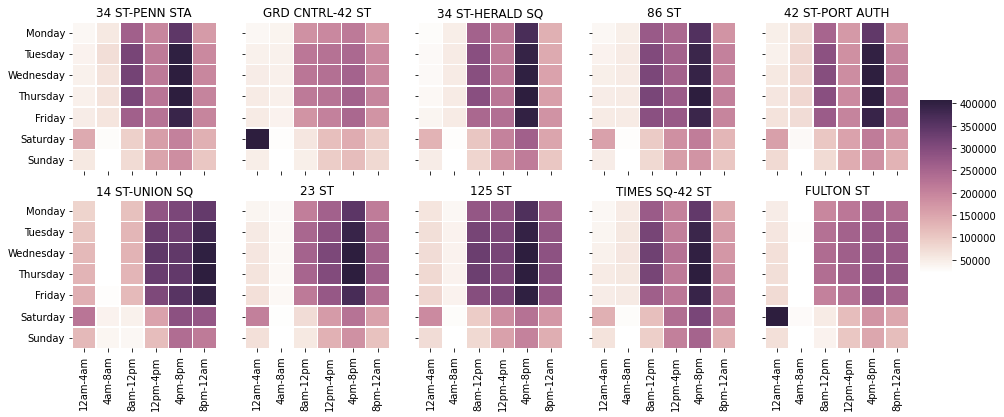

In [33]:
# Create an empty list to store the traffic matrix for each station
matrix_list= []

# Loop through the top 10 stations
for station in list(top_stations.head(10).index):
    
    # Filter the data to only include the current station
    df_station = df_10[df_10['STATION'] == station]
    
    # Group the data by day and time period and sum the traffic for each group
    group_day_time = df_station.groupby(['DAYS','TIME_PERIOD'])['TRAFFIC'].sum()
    
    # Reshape the data into a matrix, with days as rows and time periods as columns
    matrix_day_time = group_day_time.unstack()
    
    # Reset the index of the matrix
    matrix_day_time.reset_index()
    
    # Reorder the rows and columns of the matrix to match the desired order
    matrix_day_time = matrix_day_time.reindex(index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    matrix_day_time = matrix_day_time.reindex(columns=["12am-4am", "4am-8am", "8am-12pm", "12pm-4pm", "4pm-8pm", "8pm-12am"])
    
    # Add the matrix to the list
    matrix_list.append(matrix_day_time)

# Create the subplots
fig, axn = plt.subplots(2,5, sharex = True, sharey = True, figsize = (15,6))

# Set the colormap for the heatmaps
cmap = sns.cubehelix_palette(light = 1, as_cmap = True)

# Add a colorbar axis
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# Using a loop for reacing the each heatmaps
for i, ax in enumerate(axn.flat):
    station = matrix_list[i]
    sns.heatmap(station, ax = ax, cmap = cmap,
                cbar = i == 0,
                cbar_ax = None if i else cbar_ax,
                linecolor = 'white', linewidths = 0.5)
    ax.set_title(list(top_stations.head(10).index)[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.savefig('heatmap2.png',transparent = True, bbox_inches = 'tight')

**Census Analysis**

In [ ]:
cencus = pd.read_excel('Census_data.xlsx')
cencus.dropna(axis = 1, inplace = True)
cencus.head()

In [ ]:
cencus.columns

In [ ]:
cencus["Population"] = cencus["Population"].astype('int64')
cencus["FemalePercent"] = cencus["FemalePercent"].astype('float')
cencus["BachelorsDegreePercent"] = cencus["BachelorsDegreePercent"].astype('float')
cencus["MedianIncome"] = cencus["MedianIncome"].astype('int64')
cencus["TotalEmployer"] = cencus["TotalEmployer"].astype('int64')
cencus["TotalEmployment"] = cencus["TotalEmployment"].astype('int64')
cencus["AnnualPayroll"] = cencus["AnnualPayroll"].astype('int64')
cencus["AllFirms"] = cencus["AllFirms"].astype('int64')
cencus["WomenOwnedFirms"] = cencus["WomenOwnedFirms"].astype('int64')

cencus.info()

In [ ]:
plt.figure(figsize=[20,17])
plt.style.use('default')


plt.suptitle('New York Borough Census Data',fontsize = 18, weight = "bold", c = "Black")

plt.subplot(3,3,1) 
ax = sns.barplot(x = "Borough", y = "Population", data = cencus, palette = 'flare')
plt.xlabel(""), plt.ylabel("")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Population', weight = "bold");

plt.subplot(3,3,2)
ax = sns.barplot(x = "Borough", y = "FemalePercent", data = cencus, palette = 'flare')
plt.xlabel(""), plt.ylabel("")
plt.title('Female Percent', weight = "bold");


plt.subplot(3,3,3) 
ax = sns.barplot(x="Borough", y="BachelorsDegreePercent", data=cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Bachelors Degree Percent', weight="bold");

plt.subplot(3,3,4) 
ax = sns.barplot(x = "Borough", y = "MedianIncome", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Median Income', weight="bold");

plt.subplot(3,3,5) 
ax = sns.barplot(x = "Borough", y = "TotalEmployer", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Total Employer', weight="bold");

plt.subplot(3,3,6) 
ax = sns.barplot(x = "Borough", y = "TotalEmployment", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Total Employment', weight="bold");

plt.subplot(3,3,7) 
ax = sns.barplot(x = "Borough", y = "AnnualPayroll", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Annual Payroll', weight="bold");

plt.subplot(3,3,8) 
ax = sns.barplot(x = "Borough", y = "AllFirms", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('All Firms', weight = "bold");

plt.subplot(3,3,9) 
ax = sns.barplot(x = "Borough", y = "WomenOwnedFirms", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Women Owned Firms', weight = "bold");

plt.savefig('NewyorkBoroughCensusData.png', dpi=200)